In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pickle
import time


# Data preparation/Preprocessing

In [2]:
def preprocessing_pipeline(filename): 
    with open(filename) as outfile:
        all_stocks0 = json.load(outfile)
        df = pd.read_json(all_stocks0)
    df = df.drop("sector", axis=1)
    df.loc[df.beta_following_period == "mittel", "beta_following_period"] = 3
    df.loc[df.beta_following_period == "risikoreich", "beta_following_period"] = 4
    df.loc[df.beta_following_period == "sehr wenig risikoreich", "beta_following_period"] = 1
    df.loc[df.beta_following_period == "wenig risikoreich", "beta_following_period"] = 2
    df.loc[df.beta_following_period == "verläuft entgegengesetzt zur Marktentwicklung", "beta_following_period"] = 0
    df.loc[df.beta_following_period == "sehr risikoreich", "beta_following_period"] = 5
    
    # One Hot Encoding
    encoder = OneHotEncoder(sparse=False)
    cat_cols = ['country']

    # Encode Categorical Data
    df_encoded = pd.DataFrame(encoder.fit_transform(df[cat_cols]))
    df_encoded.columns = encoder.get_feature_names_out(cat_cols)

    # Replace Categotical Data with Encoded Data
    df = df.drop(cat_cols ,axis=1)
    df = pd.concat([df_encoded, df], axis=1)
    df = df.dropna()
    Y = df.beta_following_period
    Y=Y.astype('int')
    X = df.drop(["beta_following_period"], axis=1)
    return X,Y

In [3]:
X,Y = preprocessing_pipeline("msci_world_stocks.json")

In [4]:
X = X.drop(['name', 'longBusinessSummary', 'recommandationScore'], axis=1, errors='ignore')

In [5]:
# # .corr() can calculate 'pearson', 'kendall', 'spearman' correlations.
# print(df.corr(method='pearson'))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)
scaler = MinMaxScaler()
X_train_columns = X_train.columns 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
X_train.shape

(1137, 29)

In [8]:
Y.value_counts()

3    346
4    329
2    301
5    268
1    263
0      9
Name: beta_following_period, dtype: int64

# Model training

training some initial models/Klassifiers

In [9]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test))) 

Accuracy of Logistic regression classifier on training set: 0.26
Accuracy of Logistic regression classifier on test set: 0.22


C:\Users\I539001\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.27


In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= int(np.sqrt(len(X_train/2))))
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))
y_pred  = knn.predict(X_test)

Accuracy of K-NN classifier on training set: 0.33
Accuracy of K-NN classifier on test set: 0.26


In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.28
Accuracy of LDA classifier on test set: 0.23


In [13]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.08
Accuracy of GNB classifier on test set: 0.05


Accuracy of SVM classifier on training set: 0.24
Accuracy of SVM classifier on test set: 0.23


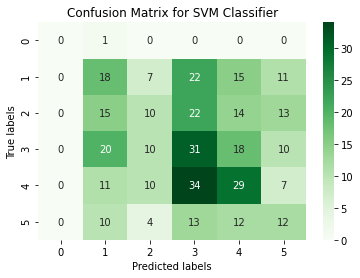

In [14]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

# y_pred  = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred )
ax = sns.heatmap(cm, annot=True, cmap='Greens')
ax.set_title("Confusion Matrix for SVM Classifier")
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))


# Evaluating


Accuracy: 0.26

Micro Precision: 0.26
Micro Recall: 0.26
Micro F1-score: 0.26

Macro Precision: 0.22
Macro Recall: 0.21
Macro F1-score: 0.21

Weighted Precision: 0.26
Weighted Recall: 0.26
Weighted F1-score: 0.26

Classification Report

              precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00         1
     Class 2       0.24      0.25      0.24        73
     Class 3       0.24      0.14      0.17        74
     Class 4       0.25      0.35      0.29        89
     Class 5       0.33      0.32      0.32        91
     Class 6       0.23      0.24      0.23        51

    accuracy                           0.26       379
   macro avg       0.22      0.21      0.21       379
weighted avg       0.26      0.26      0.26       379



C:\Users\I539001\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\I539001\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\I539001\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: 

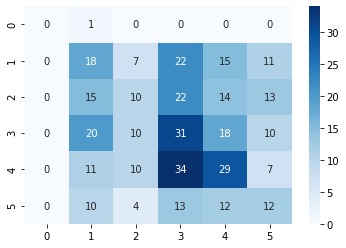

In [15]:
confusion = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix\n')
ax = sns.heatmap(confusion, annot=True, cmap='Blues')

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6']))

# Saving and loading a trained model

In [16]:
def save_model(pkl_filename, model): 
    # Save to file in the current working directory
    pickle.dump(model, open(pkl_filename, 'wb'))
    

In [17]:
def load_model(pkl_filename): 
     # Load from file
    with open(pkl_filename, 'rb') as file:
        pickle_model = pickle.load(file)
    return pickle_model

In [18]:
save_model("knn_model.pkl", knn)

In [19]:
pickle_model = load_model("knn_model.pkl")

In [20]:
# Calculate the accuracy score and predict target values
score = pickle_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))

Test score: 26.39 %


In [21]:
X,Y = preprocessing_pipeline("msci_world_stocks.json")

In [22]:
X.head()

,country_Argentina,country_Australia,country_Bermuda,country_Brazil,country_Canada,country_China,country_Denmark,country_France,country_Germany,country_Ireland,...,country_United Kingdom,country_United States,name,longBusinessSummary,cashFlow,EK_Quote,ebit_growth,revenue_growth,kgv,kuv
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,Apple Inc.,"Apple Inc. designs, manufactures, and markets ...",2.431100e+10,0.267308,0.928189,0.979589,16.004385,3.399026
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,Apple Inc.,"Apple Inc. designs, manufactures, and markets ...",-1.043500e+10,0.201733,1.039000,1.055121,31.929079,6.677524
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,Apple Inc.,"Apple Inc. designs, manufactures, and markets ...",-3.860000e+09,0.179743,1.649161,1.332594,25.458685,6.589164
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,Microsoft Corporation,"Microsoft Corporation develops, licenses, and ...",-5.900000e+08,0.357103,2.367992,1.140295,25.398821,7.919787
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,Microsoft Corporation,"Microsoft Corporation develops, licenses, and ...",2.220000e+09,0.392631,1.128466,1.136456,33.323456,10.317771


In [23]:
X_new = X.drop(['name', 'longBusinessSummary', 'recommandationScore'], axis=1, errors='ignore')

In [24]:
pickle_model.score(X_new, Y)

C:\Users\I539001\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.21767810026385223

# Saving Dataframe with predicted betas

In [25]:
def save_df_predicted_betas(filename): 
    X_new = X.drop(['name', 'longBusinessSummary', 'recommandationScore'], axis=1, errors='ignore')
    X_new["future_beta"] = pickle_model.predict(X_new)
    X_new["name"] = X.name
    X_new.to_csv(filename)
    return X_new

In [26]:
save_df_predicted_betas("predicted_daframe.csv")

C:\Users\I539001\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


,country_Argentina,country_Australia,country_Bermuda,country_Brazil,country_Canada,country_China,country_Denmark,country_France,country_Germany,country_Ireland,...,country_United Kingdom,country_United States,cashFlow,EK_Quote,ebit_growth,revenue_growth,kgv,kuv,future_beta,name
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.431100e+10,0.267308,0.928189,0.979589,16.004385,3.399026,4,Apple Inc.
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.043500e+10,0.201733,1.039000,1.055121,31.929079,6.677524,5,Apple Inc.
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-3.860000e+09,0.179743,1.649161,1.332594,25.458685,6.589164,5,Apple Inc.
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-5.900000e+08,0.357103,2.367992,1.140295,25.398821,7.919787,5,Microsoft Corporation
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.220000e+09,0.392631,1.128466,1.136456,33.323456,10.317771,4,Microsoft Corporation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,6.200000e+08,0.190474,1.050654,1.045921,29.139183,3.344011,4,Restaurant Brands International Inc.
2051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.700000e+07,0.163367,0.755832,0.886668,38.746944,3.790462,4,Restaurant Brands International Inc.
2053,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.764300e+07,0.512054,2.561981,0.644522,12.427822,11.069297,4,"Healthpeak Properties, Inc."
2054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,4.481100e+07,0.475132,0.042909,1.041147,369.632503,13.568361,4,"Healthpeak Properties, Inc."


# Neural Networks

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras import backend as K
#create model
model = Sequential()

#get number of columns in training data
n_cols_2 = X_train.shape[1]

#add layers to model
model.add(Dense(70, activation='relu', input_shape=(n_cols_2, )))
model.add(Dense(70, activation='relu'))
model.add(Dense(70, activation='relu'))
model.add(Dense(6, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy', 'mse'], metrics=['accuracy'])

In [28]:
# K.set_value(model.optimizer.learning_rate, 0.01)

In [29]:
early_stopping_monitor = EarlyStopping(patience=3)

In [30]:
history = model.fit(X_train, y_train, epochs=30, batch_size = 100, validation_split=0.3, callbacks=[early_stopping_monitor])

Epoch 1/30
8/8 [==============================] - 0s 21ms/step - loss: 1.7763 - accuracy: 0.1887 - val_loss: 1.7501 - val_accuracy: 0.1988
Epoch 2/30
8/8 [==============================] - 0s 5ms/step - loss: 1.7256 - accuracy: 0.2264 - val_loss: 1.7090 - val_accuracy: 0.2076
Epoch 3/30
8/8 [==============================] - 0s 5ms/step - loss: 1.6836 - accuracy: 0.2113 - val_loss: 1.6781 - val_accuracy: 0.2135
Epoch 4/30
8/8 [==============================] - 0s 5ms/step - loss: 1.6510 - accuracy: 0.2314 - val_loss: 1.6658 - val_accuracy: 0.2135
Epoch 5/30
8/8 [==============================] - 0s 5ms/step - loss: 1.6305 - accuracy: 0.2327 - val_loss: 1.6650 - val_accuracy: 0.2164
Epoch 6/30
8/8 [==============================] - 0s 5ms/step - loss: 1.6229 - accuracy: 0.2352 - val_loss: 1.6717 - val_accuracy: 0.2164
Epoch 7/30
8/8 [==============================] - 0s 5ms/step - loss: 1.6196 - accuracy: 0.2340 - val_loss: 1.6698 - val_accuracy: 0.2164
Epoch 8/30
8/8 [=================

In [31]:
best_score = max(history.history['accuracy'])
print(best_score)

0.23522011935710907


In [32]:
# get the model
def get_NN_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
    return model

In [33]:
n_cols_2 = X_test.shape[1]

In [34]:
model = get_NN_model(n_cols_2, 6)

In [35]:
# # make a prediction on the test set
# yhat = model.predict(X_test)
# # round probabilities to class labels
# # yhat = yhat.round()
# # calculate accuracy
# acc = accuracy_score(y_test, yhat)

In [36]:
# yhat